# Mushroom classification - Part II: Neural network with Keras 

Time to design a neural network

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout
from keras.utils.vis_utils import plot_model

2022-06-01 12:28:06.225378: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-01 12:28:06.225392: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
with open('Data/train.npy', 'rb') as f:
    train_df = np.load(f)
    train_class = np.load(f)

In [4]:
with open('Data/test.npy', 'rb') as f:
    test_df = np.load(f)
    test_class = np.load(f)

In [5]:
train_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
def create_model(depth, size=1):
    model = Sequential()
    
    model.add(Input((train_df.shape[1], )))
    
    for d in range(depth):
        model.add(Dense(16 * size, activation="relu"))
        model.add(Dense(32 * size, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="mean_squared_error", metrics = ["accuracy"])
    
    return model

model_1 = create_model(1)
model_1_2 = create_model(1,2)
model_10 = create_model(20)
model_10_2 = create_model(20,2)

2022-06-01 12:28:07.292994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 12:28:07.293151: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-01 12:28:07.293187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-01 12:28:07.293218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-01 12:28:07.293250: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [7]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1808      
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,385
Trainable params: 2,385
Non-trainable params: 0
_________________________________________________________________


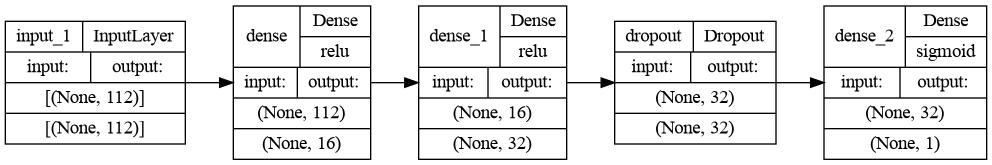

In [8]:
plot_model(model_1, show_shapes=True, to_file="Figures/model_1.png", rankdir = "LR", show_layer_activations=True)

In [9]:
def plot_loss_accuracy(model, history):
    '''
    Plot side to side the loss function and accuracy during training
    '''
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    fig.suptitle('Model loss and accuracy', fontsize = 15, fontweight='bold')
    
    ax[0].plot(range(1, epochs+1), history.history["loss"], label="Train loss")
    ax[0].set_ylabel("Loss")
    ax[0].set_xlabel("Epochs")
    ax[0].legend()
    
    ax[1].plot(range(1, epochs+1), history.history["accuracy"], label="Train accuracy")
    ax[1].plot(range(1, epochs+1), [1]*len(range(1, epochs+1)), label="100% accuracy")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_xlabel("Epochs")
    ax[1].legend()

    plt.savefig(f'Figures/training_{model}.png', facecolor='white', transparent=False)

### Modelo 1

In [10]:
epochs = 10
history_1 = model_1.fit(train_df, train_class, batch_size = 32, epochs = epochs)

Epoch 1/10
189/189 [==============================] - 0s 558us/step - loss: 0.0706 - accuracy: 0.9222
Epoch 2/10
189/189 [==============================] - 0s 560us/step - loss: 0.0048 - accuracy: 0.9977
Epoch 3/10
189/189 [==============================] - 0s 578us/step - loss: 0.0017 - accuracy: 0.9992
Epoch 4/10
189/189 [==============================] - 0s 557us/step - loss: 5.7655e-04 - accuracy: 0.9998
Epoch 5/10
189/189 [==============================] - 0s 559us/step - loss: 4.3315e-04 - accuracy: 0.9998
Epoch 6/10
189/189 [==============================] - 0s 564us/step - loss: 1.8726e-04 - accuracy: 1.0000
Epoch 7/10
189/189 [==============================] - 0s 543us/step - loss: 1.7092e-04 - accuracy: 1.0000
Epoch 8/10
189/189 [==============================] - 0s 539us/step - loss: 9.9989e-05 - accuracy: 1.0000
Epoch 9/10
189/189 [==============================] - 0s 548us/step - loss: 6.6218e-05 - accuracy: 1.0000
Epoch 10/10
189/189 [==============================] - 0s 

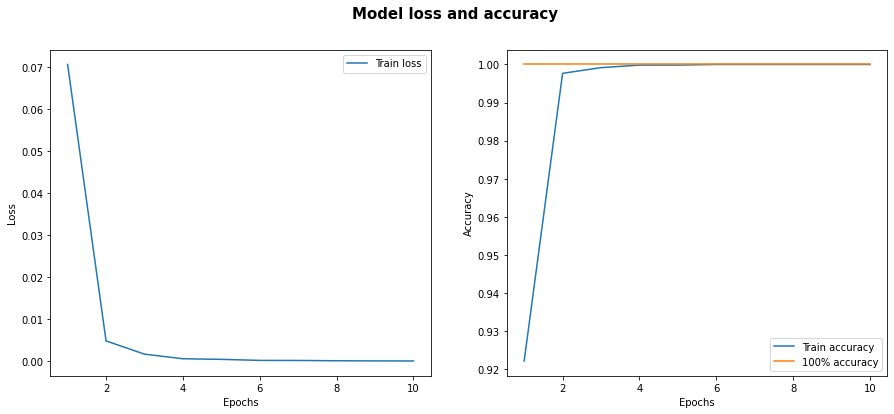

In [11]:
plot_loss_accuracy('model1', history_1)

In [12]:
model_1.evaluate(test_df, test_class, batch_size = 32, return_dict = True)

63/63 [==============================] - 0s 480us/step - loss: 9.1746e-06 - accuracy: 1.0000


{'loss': 9.17463330551982e-06, 'accuracy': 1.0}

### Model 1 double size

In [13]:
epochs = 10
history_1_2 = model_1_2.fit(train_df, train_class, batch_size = 32, epochs = epochs)

Epoch 1/10
189/189 [==============================] - 0s 586us/step - loss: 0.0539 - accuracy: 0.9448
Epoch 2/10
189/189 [==============================] - 0s 575us/step - loss: 0.0030 - accuracy: 0.9980
Epoch 3/10
189/189 [==============================] - 0s 576us/step - loss: 7.4102e-04 - accuracy: 0.9998
Epoch 4/10
189/189 [==============================] - 0s 563us/step - loss: 2.6402e-04 - accuracy: 1.0000
Epoch 5/10
189/189 [==============================] - 0s 588us/step - loss: 1.4395e-04 - accuracy: 1.0000
Epoch 6/10
189/189 [==============================] - 0s 573us/step - loss: 8.0542e-05 - accuracy: 1.0000
Epoch 7/10
189/189 [==============================] - 0s 561us/step - loss: 7.0371e-05 - accuracy: 1.0000
Epoch 8/10
189/189 [==============================] - 0s 579us/step - loss: 4.5408e-05 - accuracy: 1.0000
Epoch 9/10
189/189 [==============================] - 0s 554us/step - loss: 2.6042e-05 - accuracy: 1.0000
Epoch 10/10
189/189 [==============================] -

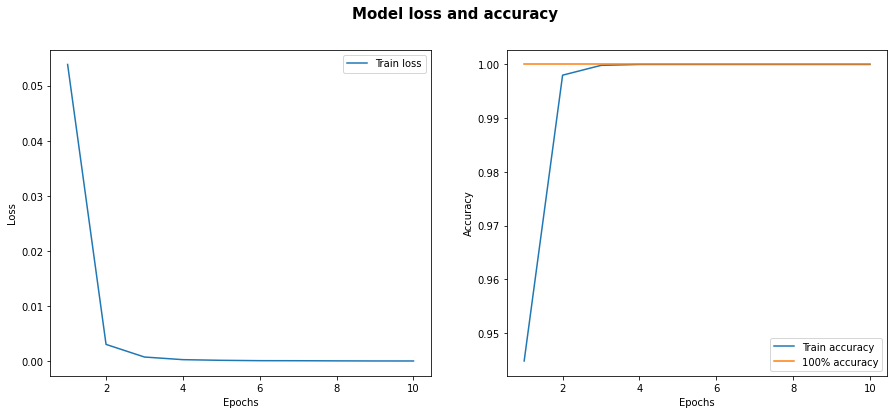

In [14]:
plot_loss_accuracy('model1_2', history_1_2)

In [15]:
model_1.evaluate(test_df, test_class, batch_size = 32, return_dict = True)

63/63 [==============================] - 0s 500us/step - loss: 9.1746e-06 - accuracy: 1.0000


{'loss': 9.17463330551982e-06, 'accuracy': 1.0}

### Model 2

In [16]:
epochs = 10
history_10 = model_10.fit(train_df, train_class, batch_size = 32, epochs = epochs)

Epoch 1/10
189/189 [==============================] - 1s 2ms/step - loss: 0.2498 - accuracy: 0.5158
Epoch 2/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5186
Epoch 3/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5183
Epoch 4/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5211
Epoch 5/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5188
Epoch 6/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5186
Epoch 7/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5186
Epoch 8/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5186
Epoch 9/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5186
Epoch 10/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5186

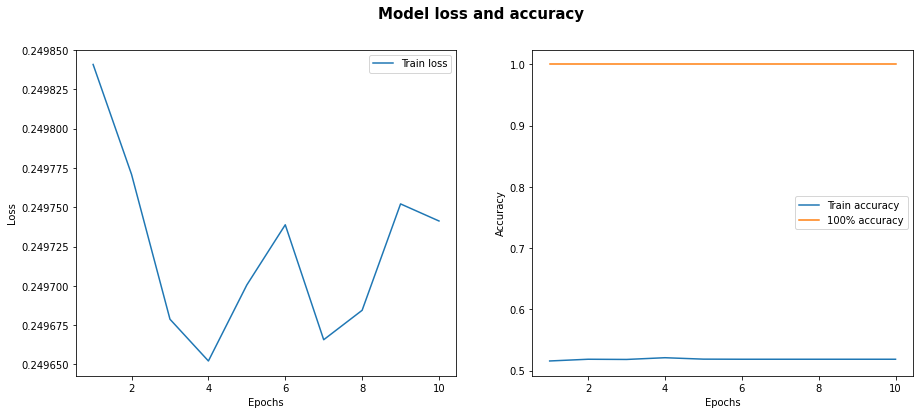

In [17]:
plot_loss_accuracy('model2', history_10)

In [18]:
model_10.evaluate(test_df, test_class, batch_size = 32, return_dict = True)

63/63 [==============================] - 0s 766us/step - loss: 0.2498 - accuracy: 0.5150


{'loss': 0.249783456325531, 'accuracy': 0.5149551630020142}

### Model 2 double size

In [19]:
epochs = 10
history_10_2 = model_10_2.fit(train_df, train_class, batch_size = 32, epochs = epochs)

Epoch 1/10
189/189 [==============================] - 1s 2ms/step - loss: 0.2499 - accuracy: 0.5133
Epoch 2/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5186
Epoch 3/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5186
Epoch 4/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5186
Epoch 5/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5186
Epoch 6/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5186
Epoch 7/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5186
Epoch 8/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5186
Epoch 9/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5186
Epoch 10/10
189/189 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5186

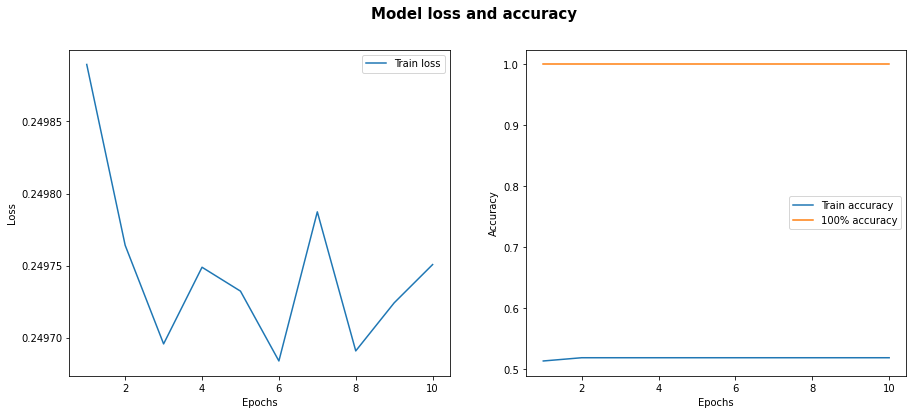

In [20]:
plot_loss_accuracy('model2_2', history_10_2)

In [21]:
model_10_2.evaluate(test_df, test_class, batch_size = 32, return_dict = True)

63/63 [==============================] - 0s 796us/step - loss: 0.2498 - accuracy: 0.5150


{'loss': 0.2497822493314743, 'accuracy': 0.5149551630020142}